In [1]:
import pandas as pd

df = pd.read_csv("../Lab1/after_lab1.csv")
df = df.drop(["Name", "Ticket"], axis = "columns")
df.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_Q,Embarked_S
0,1,0,1.0,22.0,0.125,0.0,0.014151,True,True,False,False,False,False,False,False,False,True
1,2,1,0.0,38.0,0.125,0.0,0.139136,False,False,True,False,False,False,False,False,False,False
2,3,1,1.0,26.0,0.000,0.0,0.015469,False,True,False,False,False,False,False,False,False,True
3,4,1,0.0,35.0,0.125,0.0,0.103644,False,False,True,False,False,False,False,False,False,True
4,5,0,1.0,35.0,0.000,0.0,0.015713,True,True,False,False,False,False,False,False,False,True


In [2]:
#Решить задачу регрессии для одного из непрерывных признаков в датасете. Оценить работу регрессионной модели
from sklearn.model_selection import train_test_split

X_reg = df.drop(["Age"], axis = "columns")
y_reg = df["Age"]

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size = 0.4, random_state = 14)
print(f"Len_X_reg = {len(X_reg)}\nLen_X_train_reg = {len(X_train_reg)}, Len_X_test_reg = {len(X_test_reg)}\nSumma = {len(X_train_reg) + len(X_test_reg)}")

Len_X_reg = 891
Len_X_train_reg = 534, Len_X_test_reg = 357
Summa = 891


In [3]:
X_train_reg.head(5)

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Sex_male,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_Q,Embarked_S
46,47,0,1.0,0.125,0.000000,0.030254,True,True,False,False,False,False,False,False,True,False
814,815,0,1.0,0.000,0.000000,0.015713,True,True,False,False,False,False,False,False,False,True
513,514,1,0.0,0.125,0.000000,0.115941,False,True,False,False,False,False,False,False,False,False
772,773,0,0.5,0.000,0.000000,0.020495,False,False,False,False,True,False,False,False,False,True
229,230,0,1.0,0.375,0.166667,0.049708,False,True,False,False,False,False,False,False,False,True


In [4]:
y_train_reg.head(5)

46     28.0
814    30.5
513    54.0
772    57.0
229    28.0
Name: Age, dtype: float64

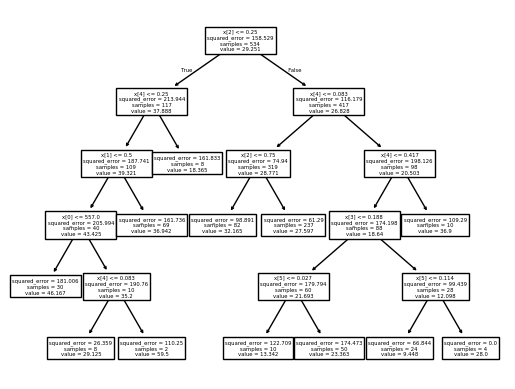

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from matplotlib import pyplot as plt

tree_model = DecisionTreeRegressor(max_depth = 7, max_leaf_nodes = 12)
tree_model.fit(X_train_reg, y_train_reg)

tree.plot_tree(tree_model)
plt.show()

In [6]:
y_pred_test_reg = tree_model.predict(X_test_reg)

from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error
MSE = mean_squared_error(y_test_reg, y_pred_test_reg)
RMSE = root_mean_squared_error(y_test_reg, y_pred_test_reg)
MAE = mean_absolute_error(y_test_reg, y_pred_test_reg)
print(f"MSE = {MSE}, RMSE = {RMSE}, MAE = {MAE}")

MSE = 152.27292355521453, RMSE = 12.33989155362455, MAE = 8.927520465222928


In [7]:
#Решить задачу классификации и оценить работу модели с помощью ROC-кривой

from sklearn.model_selection import train_test_split

X_class = df.drop(["Survived"], axis = 1)
y_class = df["Survived"]

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size = 0.4, random_state = 14)
print(f"Len_X_class = {len(X_class)}\nLen_X_train_class = {len(X_train_class)}, Len_X_test_class = {len(X_test_class)}\nSumma = {len(X_train_class) + len(X_test_class)} ")

Len_X_class = 891
Len_X_train_class = 534, Len_X_test_class = 357
Summa = 891 


In [8]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter = 1000)

logistic_model.fit(X_train_class, y_train_class)
y_proba_class = logistic_model.predict_proba(X_test_class)
print(logistic_model.classes_)

[0 1]


Text(0.5, 1.0, 'ROC curve')

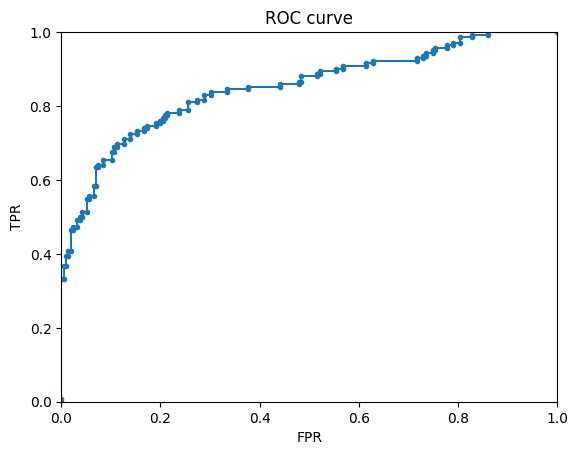

In [9]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test_class, y_proba_class[:,1])
    
plt.plot(fpr, tpr, marker='.')
plt.ylim([0,1])
plt.xlim([0,1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC curve')

In [10]:
from sklearn.metrics import auc
auc_metric = auc(fpr, tpr)

print(auc_metric)

0.8509662626924336
